# Geometric Transformations 
1. Translate the given image (lena translate.png) by (tx = 3.75, ty = 4.3) pixels.
2. Rotate the given image (pisa rotate.png) about the image centre, so as to straighten the Pisa tower.
3. Scale the given image (cells scale.png) by 0.8 and 1.3 factors

NOTE : Use bilinear interpolation during target-to-source mapping.

Reading and display Images using matplotlib

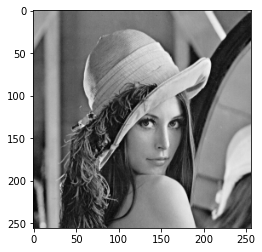

In [20]:
# importing matplotlib modules to read and plot images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read image1
img_lena = mpimg.imread('lena_translate.png')

# display image1
plt.imshow(img_lena,'gray')


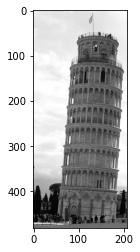

In [21]:
# Read Image2
img_pisa = mpimg.imread('pisa_rotate.png')

# Display Image2
plt.imshow(img_pisa,'gray')

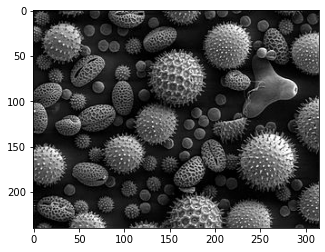

In [22]:
# Read Image3
#while trying to read the png cells_scale file I was getting an unexpected error so I converted it into jpg and read the image
img_cells = mpimg.imread('cells_scale.jpg')

# Display Image3
plt.imshow(img_cells,'gray')

To execute this code, the images will be read, only if the notebook path and images path are under same folder, so we need to make sure that the images are present in the same folder where this python notebook is saved.

# Bilinear Interpolation

To perform target to source mapping in all three transformations first we need to define a bilinear interpolation function to find intensity values of target images when they are not mapped to integer pixel co-ordinates. If the target pixel co-ordinates doesnt lie within the boundary of source image co-ordinates then the intensity value will be 0, so to do this we will parse the zero padded source image to this function. To find the intensity value at target image co-ordinates we use the following equation and if the co-ordinates are out of bound from source co-ordinates the the intensity value will be 0.

Intensity value at $(x_t,y_t)$ will be:
\begin{equation}
    I_t(x,y) = (1-a)*(1-b)*I_s(x_s',y_s') + (1-a)*(b)*I_s(x_s',y_s'+1) +  (a)*(1-b)*I_s(x_s'+1,y_s') +  (a)*(b)*I_s(x_s'+1,y_s'+1)
\end{equation}

 $ a=x_s-x_s' $, $ b=y_s-y_s' $

In [23]:
import numpy as np #numpy module is imported to handle array form of images
import math #to perform mathematical calculations
def bilinearInterpolation(image, xs, ys): 
    '''the passed image here is a zero padded image so we need to add 1 to each co-ordinate so that 
        the bilinear interpolation is performed on source image'''
    xs, ys = xs+1, ys+1
    x1, y1 = math.floor(xs), math.floor(ys) #finding the nearest integer pixel co-ordinates i.e xs',ys' as per above equation
    x_s,y_s = np.shape(image) #finding the dimensions of zero-padded source image
    x_s,y_s=x_s-2,y_s-2 #getting the dimensions of original image
    a = xs-x1
    b = ys-y1
    '''if x1,y1 lies within the source image co-ordinates then perform bilinear interpolation and 
        find the intensity value of the target image else the intensity value will be 0'''
    if x1 >= 0 and x1 <= x_s and y1 >= 0 and y1 <= y_s:
        I_t = ((1-a)*(1-b)*image[x1, y1])+ ((1-a)*b*image[x1, y1+1]) + (a*(1-b)*image[x1+1, y1])+(a*b*image[x1+1, y1+1])
    else:
        I_t = 0

    return I_t

# Translation 
Translation can be performed as follows: 

\begin{equation}
    \begin{pmatrix}
        x_t \\
        y_t     
    \end{pmatrix}
    = 
\begin{pmatrix}
        x_s \\
        y_s
\end{pmatrix} 
+
\begin{pmatrix}
        t_x \\
        t_y
\end{pmatrix} 
\end{equation}

As target to source mapping is done, translation is done as follows:

\begin{equation}
    \begin{pmatrix}
        x_s \\
        y_s     
    \end{pmatrix}
    = 
\begin{pmatrix}
        x_t \\
        y_t
\end{pmatrix} 
-
\begin{pmatrix}
        t_x \\
        t_y
\end{pmatrix} 
\end{equation}

In [24]:
def translate(source_image,parameters):
    x, y = np.shape(source_image) #storing dimensions of the image in x,y
    image = np.zeros((x+2, y+2))  #creating an image with dimensions more than source image 
    image[1:-1, 1:-1] = source_image #source image is stored into this image with borders still being zeros i.e the source image is zero padded and stored into 'image'
    target_image = np.zeros((x, y)) #creating a target image initially with all zeroes
    tx, ty = parameters
    for xt in range(x):
        for yt in range(y):
            xs = xt-tx
            ys = yt-ty
            val = bilinearInterpolation(image, xs, ys) #for target to source mapping using bilinear interpolation
            target_image[xt, yt] = val #intensity value of translated image 

    return target_image

Choose tx and ty
Enter tx:
3.75
Enter ty:
4.3


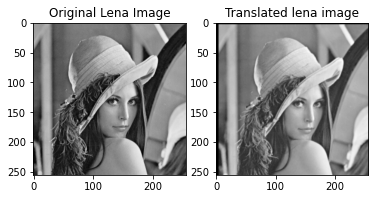

In [25]:
#asking user to provide translation parameters tx and ty
print("Choose tx and ty")
tx = float(input("Enter tx:\n"))
ty = float(input("Enter ty:\n"))
                
translated_lena = translate(img_lena,parameters=(tx, ty)) #passing the input image and translation parameters to 'translate' function defined above

#plotting the images
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.imshow(img_lena,'gray')
ax2.imshow(translated_lena,'gray')

ax1.title.set_text("Original Lena Image")
ax2.title.set_text("Translated lena image")

plt.show()

Reasonable amount of difference can be observed by considering different values for tx and ty. Here I have implemented a general translation code for any tx and ty values where user can provide the values. So, to observe the output according to the question enter tx=3.75 and ty=4.3

# Rotation 

To rotate the pisa image about its centre, before performing rotation first we need to add zeroes around the surroundings of the source image.To rotate about the center or about any point we need to first translate to that point so here we need to translate to center i.e $ x_c'=x_t-x_c, y_c'=y_t-y_c $ then we apply rotation with respect to this translated point and then we translate it back.

To perform rotation about any point by an angle theta can be done as follows. 
As we are performing target to source mapping the equation will be as follows:

\begin{equation}
    \begin{pmatrix}
        x_s \\
        y_s     
    \end{pmatrix}
    = 
\begin{matrix}
    \left( \begin{array}{cc}
        \cos\theta & -\sin\theta \\
         \sin\theta & \cos\theta
        \end{array} \right)
        %
        \left( \begin{array}{cc}
        x_c' \\
        y_c'
\end{array} \right)
\end{matrix} 
+
\begin{pmatrix}
    x_c \\
    y_c
\end{pmatrix}
\end{equation}


In [26]:
def rotate(source_image,angle_of_rotation):
    x, y = np.shape(source_image)
    image = np.zeros((x+2, y+2))
    image[1:-1, 1:-1] = source_image
    x_c,y_c = x/2,y/2
    target_image = np.zeros((x, y))
    theta = angle_of_rotation
    theta *= np.pi/180
    
    for xt in range(x):
        for yt in range(y):
            x_c1, y_c1 = xt-x_c, yt-y_c #first translating about center
            xs = np.cos(theta)*x_c1 - np.sin(theta)*y_c1 + x_c  #rotating the translated image and translating back
            ys = np.cos(theta)*y_c1 + np.sin(theta)*x_c1 + y_c
            val = bilinearInterpolation(image, xs, ys)
            target_image[xt, yt] = val
    return target_image

Choose angle of rotation in degrees: 
-2.8


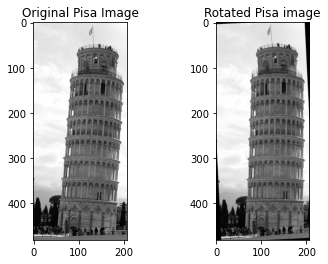

In [27]:
#asking user to provide rotation parameter theta 
print("Choose angle of rotation in degrees: ")
theta = float(input())
rotated_pisa = rotate(img_pisa, angle_of_rotation=theta)
#plotting the images
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.imshow(img_pisa,'gray')
ax2.imshow(rotated_pisa,'gray')

ax1.title.set_text("Original Pisa Image")
ax2.title.set_text("Rotated Pisa image")

plt.show()

Choose a proper angle of rotation to straighten the pisa image, as the image is tilted towards the right side, negative angle of rotation will work and as it is not tilted at very large angles, a small negative angle of rotation can straighten the image. 

# Scaling 

Scaling can be performed as follows:

\begin{equation}
    \begin{pmatrix}
        x_t \\
        y_t    
    \end{pmatrix}
    = 
\begin{matrix}
    \left( \begin{array}{cc}
        a & 0 \\
         0 & a
        \end{array} \right)
        %
        \left( \begin{array}{cc}
        x_s \\
        y_s
\end{array} \right)
\end{matrix} 
\end{equation}

$$ x_t = a*x_s $$
$$ y_t = a*y_s $$

For target to source mapping 

$$ x_s = \frac{1}{a}*x_t $$
$$ y_s = \frac{1}{a}*y_t $$

where a is a scaling factor

In [28]:
def scaling(source_image,scale_factor):   
    x, y = np.shape(source_image)
    image = np.zeros((x+2, y+2))
    image[1:-1, 1:-1] = source_image
    target_image = np.zeros((x, y))
    scale = scale_factor
    for xt in range(x):
        for yt in range(y):
            xs = xt/scale
            ys = yt/scale
            val = bilinearInterpolation(image, xs, ys)
            target_image[xt, yt] = val
    return target_image

Choose scaling factor: 
0.8


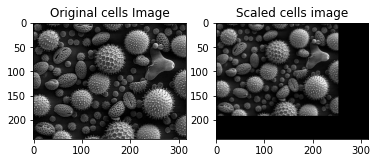

In [29]:
#asking user to provide scale factor
print("Choose scaling factor: ")
scale = float(input())
scaled_cells = scaling(img_cells, scale_factor=scale)

#plotting images
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.imshow(img_cells,'gray')
ax2.imshow(scaled_cells,'gray')
ax1.title.set_text("Original cells Image")
ax2.title.set_text("Scaled cells image")
plt.show()

To align the scaled output to the center we can actually first translate to the centre then apply rotation and translate back whereas the above scaling code executes and aligns output towards origin.

Choose scaling factor: 
0.8


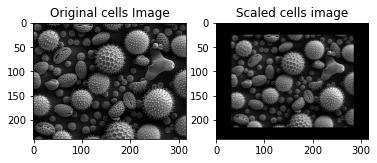

In [30]:
def scaling(source_image,scale_factor):   
    x, y = np.shape(source_image)
    image = np.zeros((x+2, y+2))
    image[1:-1, 1:-1] = source_image
    # center of the given image
    x_c, y_c = x/2, y/2
    target_image = np.zeros((x, y))
    scale = scale_factor
    for xt in range(x):
        for yt in range(y):
            xs = (xt-x_c)/scale + x_c
            ys = (yt-y_c)/scale + y_c
            val = bilinearInterpolation(image, xs, ys)
            target_image[xt, yt] = val
    return target_image

#asking user to provide scale factor
print("Choose scaling factor: ")
scale = float(input())
scaled_cells = scaling(img_cells, scale_factor=scale)

#plotting images
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.imshow(img_cells,'gray')
ax2.imshow(scaled_cells,'gray')
ax1.title.set_text("Original cells Image")
ax2.title.set_text("Scaled cells image")
plt.show()

As we can observe, now the scaled output is aligned to centre. The above scaling code is provided for any scale factor so provide different scale factors and observe the output.